# ENGR 1330 – Computational Thinking and Data Science

## HVAC Energy Predictor Final Project - Background

About 25% to 50%  of the total energy consumption by residential buildings are taken by Heating Ventilation and Air Conditioning (HVAC) systems. Architectural design factors involving size, shape and orientation of buildings significantly affect the heating and cooling load. A systematic study on dependence of heating and cooling load on architectural features can lead to energy efficient home design.  



## Objective(s):

- Literature scan on HVAC systems and their efficiency
- Analyze an existing  database and build data models to predict the heating load and cooling load
- Implement a function to allow users to enter and return an estimated (by defining and function that takes input parameters and plugs them in into the model that you have found and returns the output)

### HOW-TO Video Link: https://www.youtube.com/watch?v=aJzk_b9jP9c

# PROJECT START

## Data Set Explaination 
The dataset consists of 10 columns in total. The first 8 columns are the feature columns. They are 'Relative Compactness', 'Surface Area', 'Wall Area',
'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution', 'Heating Load', and 'Cooling Load' respectively. And the last
two columns are target columns or output columns. They are 'Heating Load' and 'Cooling Load' respectively. And, we don't have to prune the dataset, as there is no null value in it. There are 768 rows of data in all. 


In [8]:
# installing this module to import the specific dataset
!pip install ucimlrepo

In [9]:
# Importing the necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [10]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
energy_efficiency = fetch_ucirepo(id=242) 
  
# data (as pandas dataframes) 
X = energy_efficiency.data.features 
y = energy_efficiency.data.targets 
  
# metadata 
print(energy_efficiency.metadata) 
  
# variable information 
print(energy_efficiency.variables) 

{'uci_id': 242, 'name': 'Energy Efficiency', 'repository_url': 'https://archive.ics.uci.edu/dataset/242/energy+efficiency', 'data_url': 'https://archive.ics.uci.edu/static/public/242/data.csv', 'abstract': 'This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters.', 'area': 'Computer Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 768, 'num_features': 8, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Y1', 'Y2'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C51307', 'creators': ['Athanasios Tsanas', 'Angeliki Xifara'], 'intro_paper': {'ID': 379, 'type': 'NATIVE', 'title': 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine 

In [11]:
# Features
print(X)
print(X.info())
print(X.describe())

       X1     X2     X3      X4   X5  X6   X7  X8
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0
..    ...    ...    ...     ...  ...  ..  ...  ..
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5

[768 rows x 8 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      

In [12]:
# Target / Output
print(y)
print(y.info())
print(y.describe())

        Y1     Y2
0    15.55  21.33
1    15.55  21.33
2    15.55  21.33
3    15.55  21.33
4    20.84  28.28
..     ...    ...
763  17.88  21.40
764  16.54  16.88
765  16.44  17.11
766  16.48  16.61
767  16.64  16.03

[768 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y1      768 non-null    float64
 1   Y2      768 non-null    float64
dtypes: float64(2)
memory usage: 12.1 KB
None
               Y1          Y2
count  768.000000  768.000000
mean    22.307201   24.587760
std     10.090196    9.513306
min      6.010000   10.900000
25%     12.992500   15.620000
50%     18.950000   22.080000
75%     31.667500   33.132500
max     43.100000   48.030000


### Plotting the Data Columns Against Each Other to Observe Relations

       X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
..    ...    ...    ...     ...  ...  ..  ...  ..    ...    ...
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5  17.88  21.40
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5  16.54  16.88
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5  16.44  17.11
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5  16.48  16.61
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5  16.64  16.03

[768 rows x 10 columns]


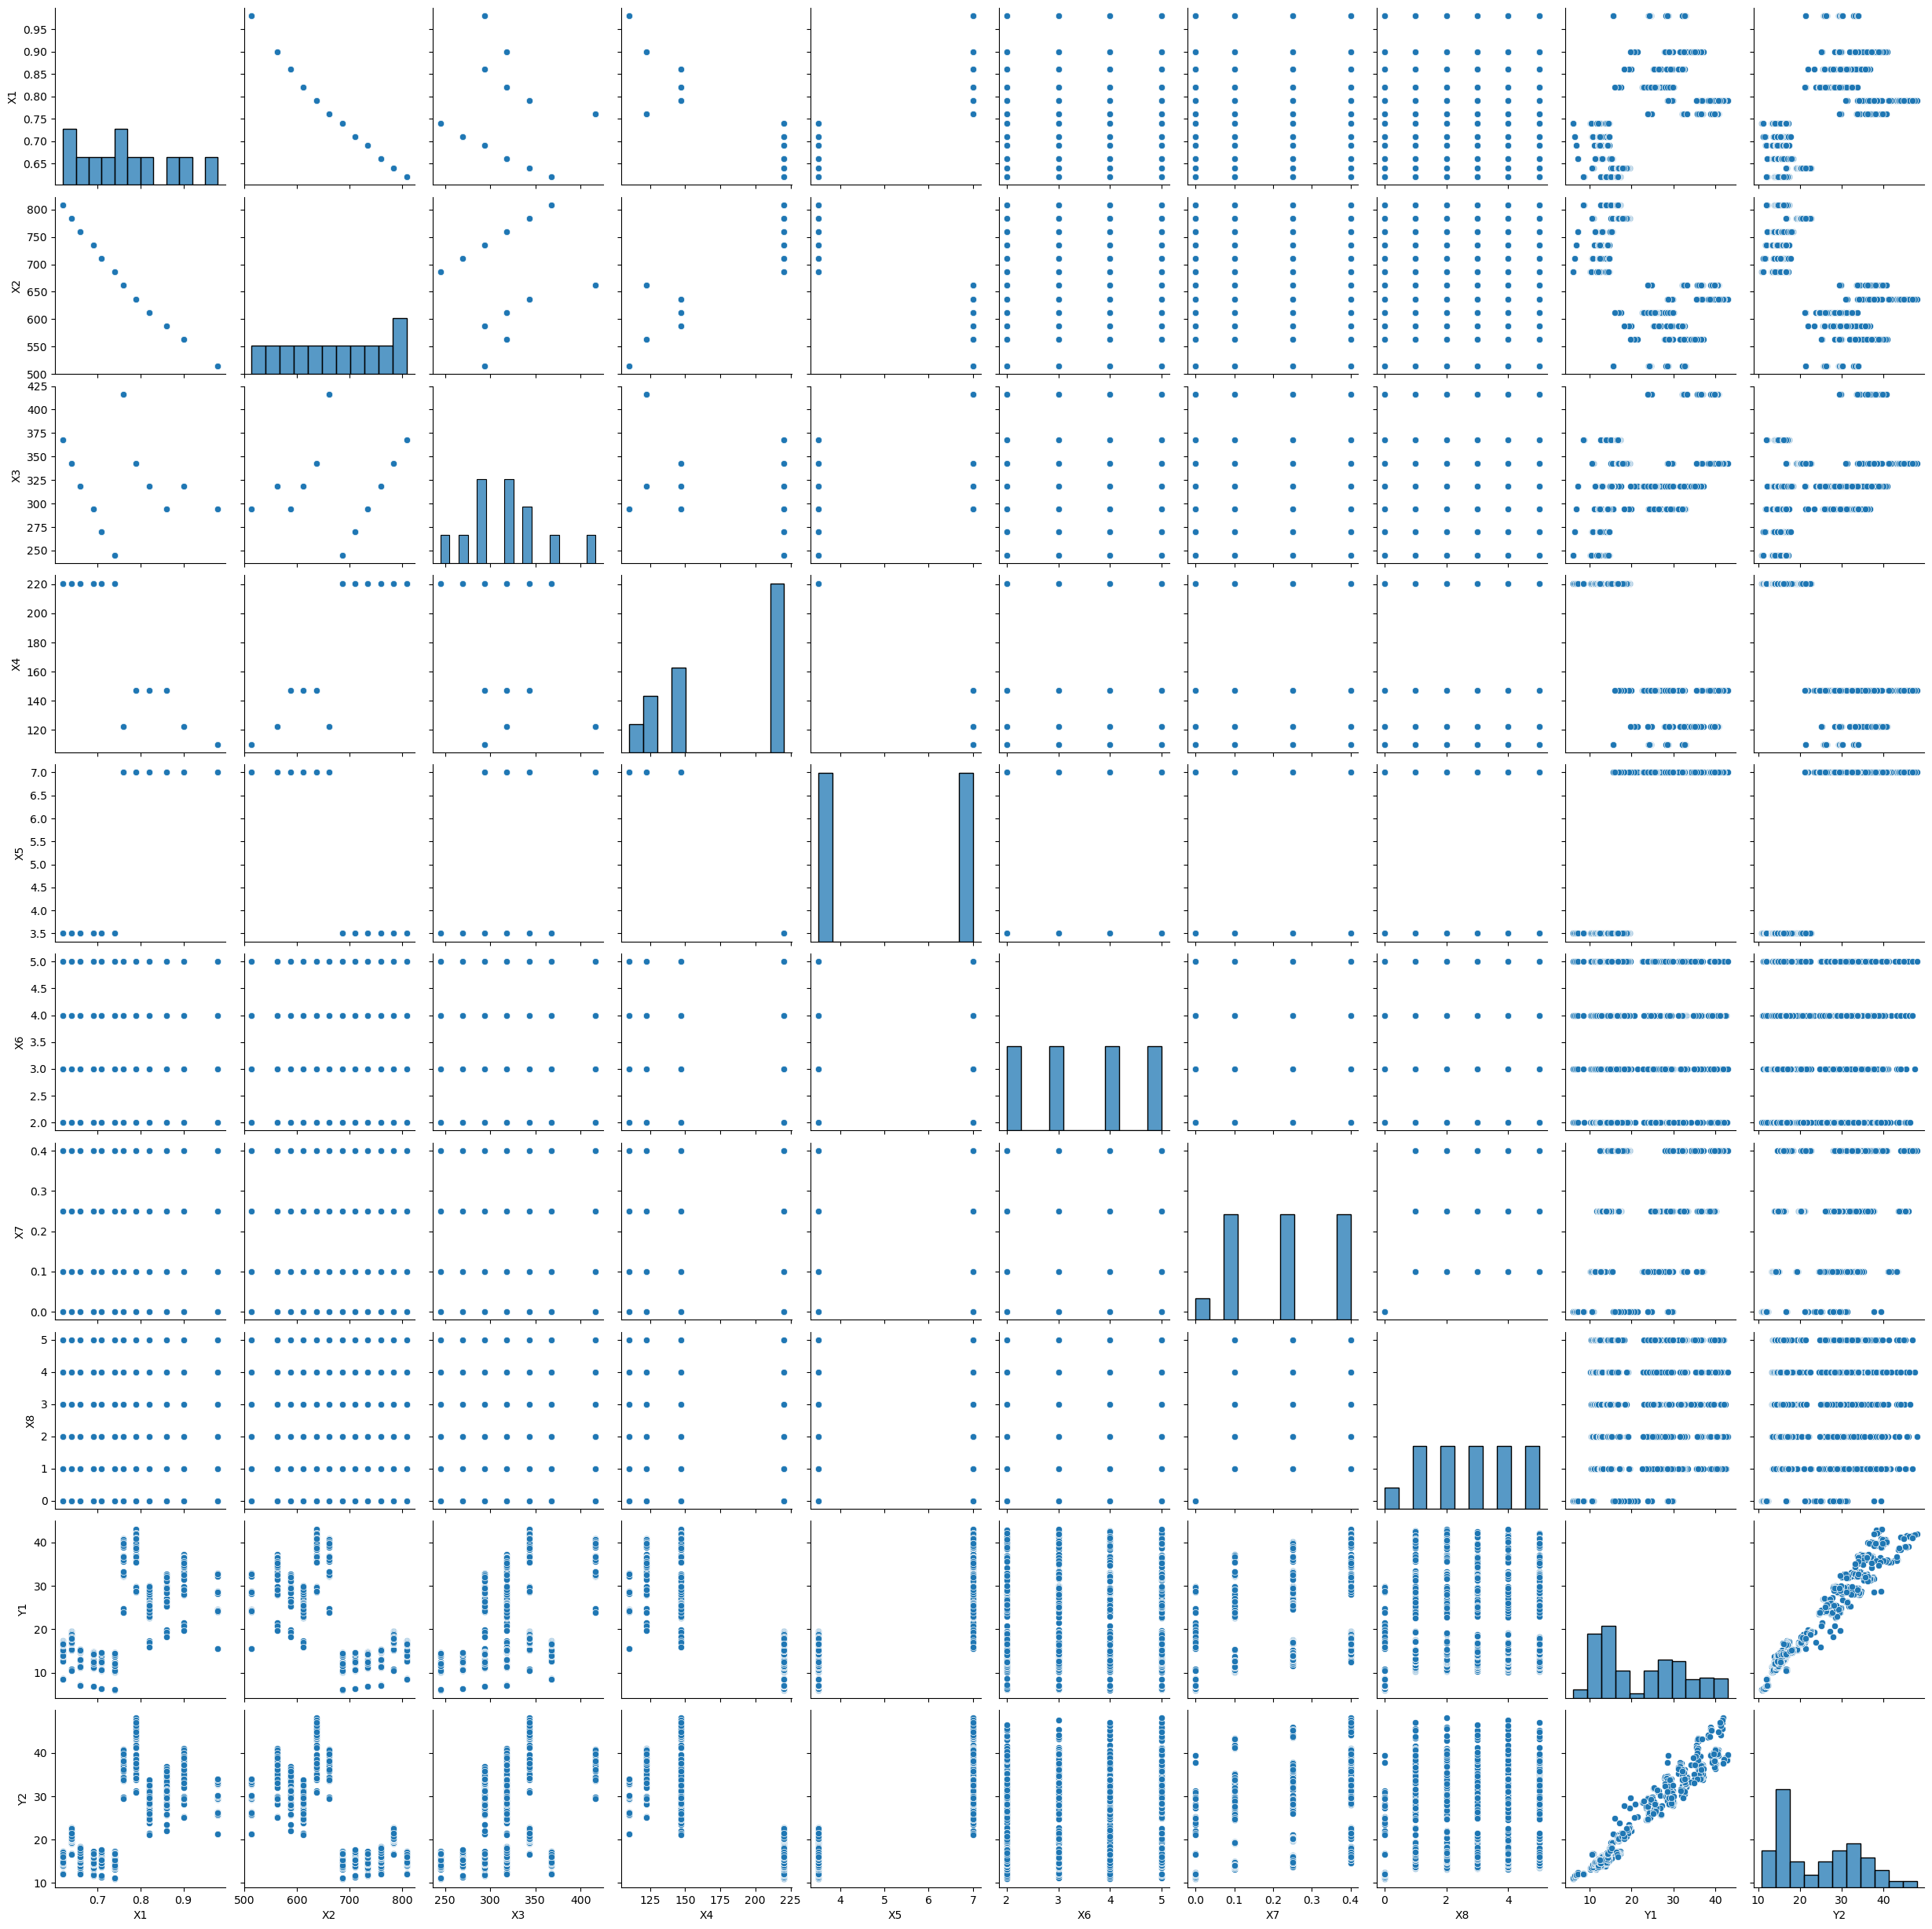

In [14]:
data = pd.concat([X, y], axis=1)  
print(data)
plots = sns.pairplot(data)

Text(0.5, 1.0, 'Correlation Heatmap of Dataset')

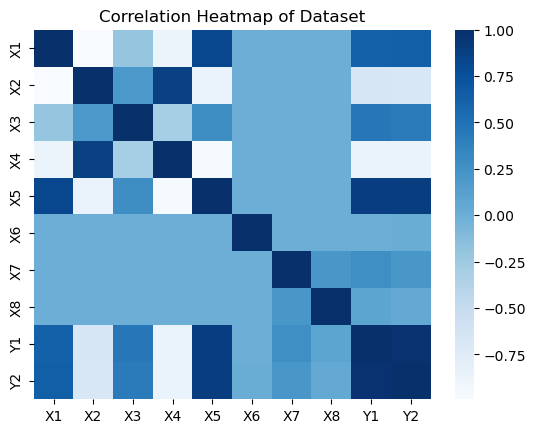

In [15]:
# Heatmap of Correlation for visualizing feathers-output relation

corr_data = data.corr()
sns.heatmap(corr_data, annot = False, cmap='Blues')
plt.title("Correlation Heatmap of Dataset")

### Creation of Model

In [17]:
# Standardizing the Data
mean = []
std = []
for series_name, series in data.items():
    m = np.mean(series)
    s = np.std(series)
    data[series_name + ' (std units)'] = (series - m) / s
    mean.append(m)
    std.append(s)

print(data)

       X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2  \
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33   
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33   
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33   
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33   
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28   
..    ...    ...    ...     ...  ...  ..  ...  ..    ...    ...   
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5  17.88  21.40   
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5  16.54  16.88   
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5  16.44  17.11   
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5  16.48  16.61   
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5  16.64  16.03   

     X1 (std units)  X2 (std units)  X3 (std units)  X4 (std units)  \
0          2.041777       -1.785875       -0.561951       -1.470077   
1          2.041777       -1.785875       -0.561951  

In [18]:
data_size = data.shape[0]

# This shuffles the data, ensuring no bias
random = data.sample(data_size, replace = False)

# 2/3 data -> Training Set, 1/3 data -> Test set
training_set = random.iloc[0:data_size // 3 * 2, :]
test_set = random.iloc[data_size // 3 * 2:, :]

print(len(training_set))
print(len(test_set))

512
256


In [19]:
# Dividing up the train and test datasets into x (feature) dataset and y (target) dataset


x_train = training_set.iloc[:, 10:18].values
y_train_heating = training_set.iloc[:, 18].values
y_train_cooling = training_set.iloc[:, 19].values
y_train_heating = np.reshape(y_train_heating, (len(y_train_heating), 1))
y_train_cooling = np.reshape(y_train_cooling, (len(y_train_cooling), 1))


x_test = test_set.iloc[:, 10:18].values
y_test_heating = test_set.iloc[:, 18].values
y_test_cooling = test_set.iloc[:, 19].values
y_test_heating = np.reshape(y_test_heating, (len(y_test_heating), 1))
y_test_cooling = np.reshape(y_test_cooling, (len(y_test_cooling), 1))


print("x_train_Shape:", np.shape(x_train))
print("y_train_Shape_heating:", np.shape(y_train_heating))
print("y_train_Shape_cooling:", np.shape(y_train_cooling))

print("x_test_Shape:", np.shape(x_test))
print("y_test_Shape_heating:", np.shape(y_test_heating))
print("y_test_Shape_cooling:", np.shape(y_test_cooling))




x_train_Shape: (512, 8)
y_train_Shape_heating: (512, 1)
y_train_Shape_cooling: (512, 1)
x_test_Shape: (256, 8)
y_test_Shape_heating: (256, 1)
y_test_Shape_cooling: (256, 1)


In [20]:
#Transposing and stacking a row of ones vertically to the 'x_train and x_test' for the purposes of vectorization

# This comes from the need to have x0 = [1 1 1 .....] for performing vector operations with theta(n) (parameters of
# the regression line) and x(n) (features)

x_train_trans = np.transpose(x_train)
x_train_Aug = np.vstack((np.ones((1,len(x_train))),x_train_trans))
print("x_train_Aug:", np.shape(x_train_Aug))

x_test_trans = np.transpose(x_test)
x_test_Aug = np.vstack((np.ones((1,len(x_test))),x_test_trans))
print("x_test_Aug:", np.shape(x_test_Aug))

x_train_Aug

x_train_Aug: (9, 512)
x_test_Aug: (9, 256)


array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.90658039,  1.28497917, -0.22861593, ..., -1.17461286,
        -0.98541347,  2.04177671],
       [-0.95092039, -1.22923856,  0.16235226, ...,  1.27562492,
         0.99730676, -1.78587489],
       ...,
       [-0.4472136 ,  0.4472136 , -1.34164079, ..., -1.34164079,
        -1.34164079,  1.34164079],
       [ 1.2440492 ,  1.2440492 ,  1.2440492 , ..., -1.76044698,
         1.2440492 ,  1.2440492 ],
       [ 1.41133622,  1.41133622,  0.76615395, ..., -1.81457514,
         0.12097168,  0.12097168]])

In [21]:
# Now we have to take some random values as start values to put into the gradient descent formula
# Lets assume the parameter values (thetas) to be zero at the start
param_number = X.shape[1]

# 1 extra for theta_0 / intercept
theta = np.zeros((param_number + 1, 1))
print(theta.shape)


(9, 1)


In [22]:
# We start with determining the theta values for heating load prediction
y_train = y_train_heating

In [23]:
#Implementing the gradient descent algorithm

# max number of steps
no_of_iter = np.arange(1, 4000000)

# Step Size per delta_theta
alpha = 0.0005


m_train = len(x_train)
m_test = len(x_test)


costfunc = []


def theta_determiner(cost_func, x_train_Aug, y_train):
    global theta, alpha, m_train, no_of_iter
    #Iteration loop
    for i in no_of_iter:
        z = np.transpose(theta)@x_train_Aug #Hypothesis function
        cf = (1/(2*m_train))*(np.sum((np.transpose(z)-y_train)**2)) #Cost function
        costfunc.append(cf) 
        
        delthetaj = (1/m_train)*((x_train_Aug)@(np.transpose(z)-y_train)) #Derivative of cost function
        theta = theta - (alpha*delthetaj) #Updating theta values
    

theta_determiner(costfunc, x_train_Aug, y_train)

print(len(costfunc))
print(theta)



3999999
[[-0.0091346 ]
 [-0.6379091 ]
 [-0.36600812]
 [ 0.08296812]
 [-0.3969787 ]
 [ 0.69755614]
 [-0.00334652]
 [ 0.25473618]
 [ 0.0371455 ]]


In [24]:
heating_theta = theta
heating_costfunc = costfunc.copy()

In [25]:
# Now we get the theta for cooling

theta = np.zeros((param_number + 1, 1))
y_train = y_train_cooling
del costfunc

costfunc = []


theta_determiner(costfunc, x_train_Aug, y_train)


cooling_theta = theta
cooling_costfunc = costfunc.copy()


print(len(cooling_costfunc))
cooling_theta

3999999


array([[-0.01801068],
       [-0.79883617],
       [-0.46069151],
       [ 0.01863015],
       [-0.45823561],
       [ 0.70344245],
       [ 0.01486002],
       [ 0.19928314],
       [ 0.01773679]])

Text(0.5, 1.0, 'Predictions vs. actual values in the training set for Heating Load (Linear Regression)')

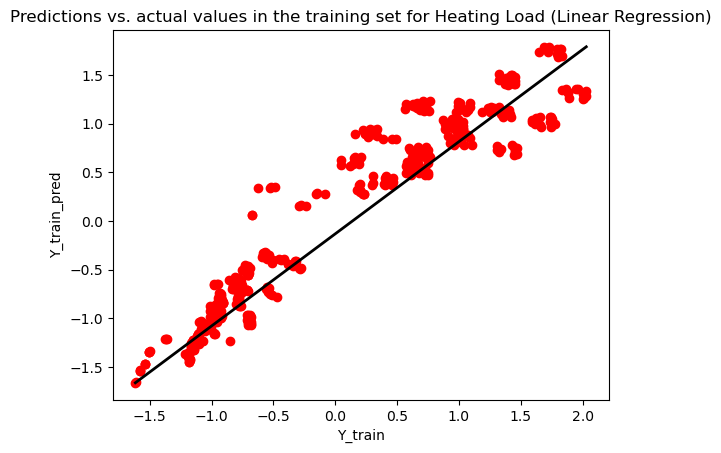

In [26]:
#Testing the model on the training set

# Predicted Values for heating load
theta = heating_theta
y_train = y_train_heating


h_theta = np.transpose(theta)@x_train_Aug
y_train_pred = np.transpose(h_theta)

y_train_pred_heating = y_train_pred

plt.scatter(y_train, y_train_pred, color='r')
plt.plot([y_train.min(), y_train.max()], [y_train_pred.min(), y_train_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_train")
plt.ylabel("Y_train_pred")
plt.title("Predictions vs. actual values in the training set for Heating Load (Linear Regression)")

Text(0.5, 1.0, 'Predictions vs. actual values in the training set for Cooling Load (Linear Regression)')

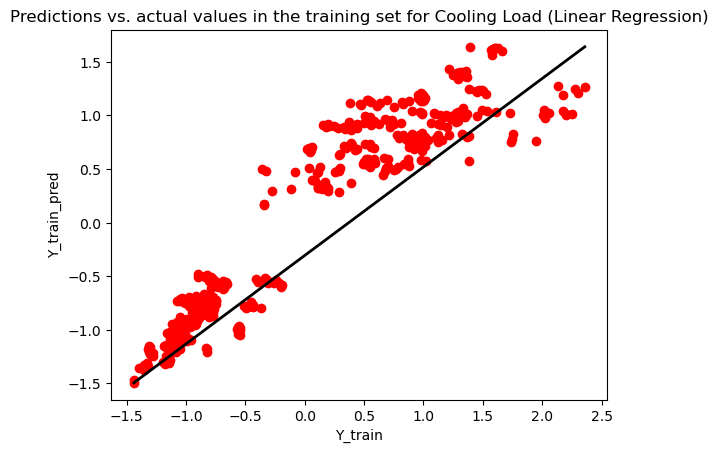

In [27]:
# Now Predicted Values for cooling load
theta = cooling_theta
y_train = y_train_cooling


h_theta = np.transpose(theta)@x_train_Aug
y_train_pred = np.transpose(h_theta)

y_train_pred_cooling = y_train_pred

plt.scatter(y_train, y_train_pred, color='r')
plt.plot([y_train.min(), y_train.max()], [y_train_pred.min(), y_train_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_train")
plt.ylabel("Y_train_pred")
plt.title("Predictions vs. actual values in the training set for Cooling Load (Linear Regression)")

Text(0.5, 1.0, 'Predictions vs. actual values in the test set for Heating Load (Linear Regression)')

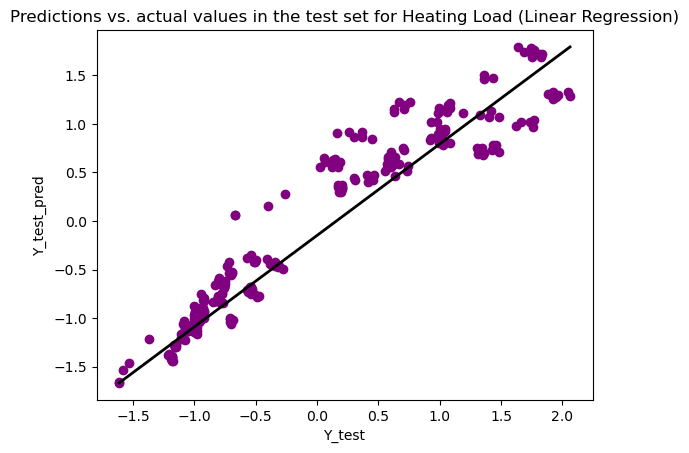

In [28]:
#Testing the model on the test set

# Testing with heating_laod theta values

theta = heating_theta
y_test = y_test_heating


h_theta = np.transpose(theta)@x_test_Aug
y_test_pred = np.transpose(h_theta)

y_test_pred_heating = y_test_pred

plt.scatter(y_test, y_test_pred, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test_pred.min(), y_test_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_test")
plt.ylabel("Y_test_pred")
plt.title("Predictions vs. actual values in the test set for Heating Load (Linear Regression)")




Text(0.5, 1.0, 'Predictions vs. actual values in the test set for Cooling Load (Linear Regression)')

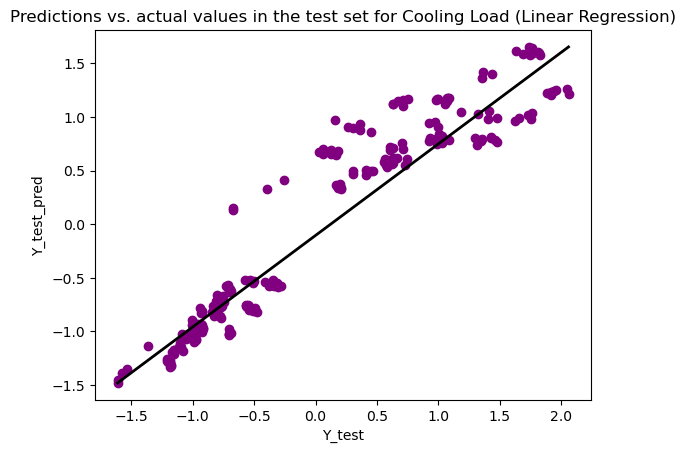

In [29]:
# Testing with cooling_load theta values

theta = cooling_theta
y_test = y_test_heating


h_theta = np.transpose(theta)@x_test_Aug
y_test_pred = np.transpose(h_theta)

y_test_pred_cooling = y_test_pred

plt.scatter(y_test, y_test_pred, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test_pred.min(), y_test_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_test")
plt.ylabel("Y_test_pred")
plt.title("Predictions vs. actual values in the test set for Cooling Load (Linear Regression)")

Text(0.5, 1.0, 'Cost function vs. number of iterations for Heating Load (Linear Regression)')

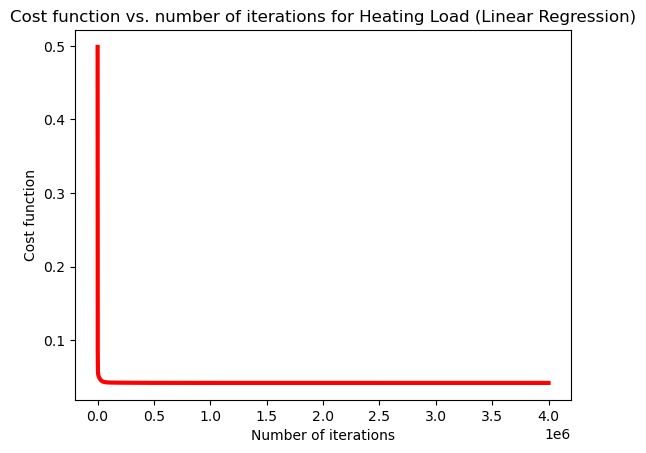

In [30]:
#Plotting cost function vs. number of iterations

# First heating

plt.plot(no_of_iter[:len(no_of_iter)],heating_costfunc[:len(no_of_iter)],color='r',linewidth = '3')
plt.xlabel("Number of iterations")
plt.ylabel("Cost function")
plt.title("Cost function vs. number of iterations for Heating Load (Linear Regression)")

Text(0.5, 1.0, 'Cost function vs. number of iterations for Cooling Load (Linear Regression)')

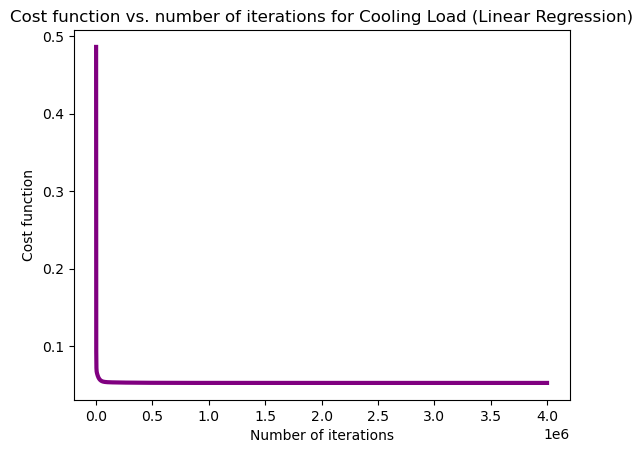

In [31]:
# Now plotting cooling cost function
plt.plot(no_of_iter[:len(no_of_iter)],cooling_costfunc[:len(no_of_iter)],color='purple',linewidth = '3')
plt.xlabel("Number of iterations")
plt.ylabel("Cost function")
plt.title("Cost function vs. number of iterations for Cooling Load (Linear Regression)")


## Model Performance

In [33]:
def r2_score(y_true, y_pred):
  """Calculates the R-squared value between true and predicted values."""
  y_mean = np.mean(y_true)
  ss_tot = np.sum((y_true - y_mean) ** 2)
  ss_res = np.sum((y_true - y_pred) ** 2)
  return 1 - (ss_res / ss_tot)

# WE WANT R2 TO BE AS CLOSE TO 1. The closer to 1 it is, the greater the 'fit' of the model. 

In [34]:
#Computing the MSE, the RMSE and the R2 values for the predictions made on the training set


y_train = y_train_heating * std[8] + mean[8]
y_train_pred = y_train_pred_heating * std[8] + mean[8]

MSE_train = (1/m_train)*(np.sum((y_train-y_train_pred)**2))
RMSE_train = np.sqrt(MSE_train) 
r2_train = r2_score(y_train, y_train_pred)

print("FOR HEATING LOAD PREDICTION (TRAINING SET): ")
print(f"MSE: {MSE_train }")
print(f"RMSE: {RMSE_train}")
print(f"R2 SCORE: {r2_train}")

FOR HEATING LOAD PREDICTION (TRAINING SET): 
MSE: 8.564039906531875
RMSE: 2.926438092038148
R2 SCORE: 0.9155288206425174


In [35]:

y_train = y_train_cooling * std[9] + mean[9]
y_train_pred = y_train_pred_cooling * std[9] + mean[9]

MSE_train = (1/m_train)*(np.sum((y_train-y_train_pred)**2))
RMSE_train = np.sqrt(MSE_train)
r2_train = r2_score(y_train, y_train_pred)


print("FOR COOLING LOAD PREDICTION (TRAINING SET): ")
print(f"MSE: {MSE_train}")
print(f"RMSE: {RMSE_train}")
print(f"R2 SCORE: {r2_train}")

FOR COOLING LOAD PREDICTION (TRAINING SET): 
MSE: 9.485177303179508
RMSE: 3.0798015038601934
R2 SCORE: 0.8920365059106304


In [36]:
#Computing the MSE and the RMSE values for the predictions made on the test set

y_test = y_test_heating * std[8] + mean[8]
y_test_pred = y_test_pred_heating * std[8] + mean[8]

MSE_test = (1/m_test)*(np.sum((y_test-y_test_pred)**2))
RMSE_test = np.sqrt(MSE_test)
r2_test = r2_score(y_test, y_test_pred)


print("FOR HEATING LOAD PREDICTION (TESTING SET): ")
print(f"MSE: {MSE_test}")
print(f"RMSE: {RMSE_test}")
print(f"R2 SCORE: {r2_test}")

FOR HEATING LOAD PREDICTION (TESTING SET): 
MSE: 8.532565119694176
RMSE: 2.921055480420421
R2 SCORE: 0.9165622374272401


In [37]:
y_test = y_test_cooling * std[9] + mean[9]
y_test_pred = y_test_pred_cooling * std[9] + mean[9]

MSE_test = (1/m_test)*(np.sum((y_test-y_test_pred)**2))
RMSE_test = np.sqrt(MSE_test)
r2_test = r2_score(y_test, y_test_pred)


print("FOR COOLING LOAD PREDICTION (TESTING SET): ")
print(f"MSE: {MSE_test}")
print(f"RMSE: {RMSE_test}")
print(f"R2 SCORE: {r2_test}")

FOR COOLING LOAD PREDICTION (TESTING SET): 
MSE: 11.680160780007999
RMSE: 3.4176250203917924
R2 SCORE: 0.8775072035425457


In [38]:
print(f"Heating Load Range: {np.max(y.iloc[:, 0]) - np.min(y.iloc[:, 0])}")
print(f"Cooling Load Range: {np.max(y.iloc[:, 1]) - np.min(y.iloc[:, 1])}")


Heating Load Range: 37.09
Cooling Load Range: 37.13


### Notes:
1. The RMSE values hover around 10% of the range of the Heating load and Cooling load. This means that the model is relatively accurate. However, there is a lot of room to improve.
2. The MSE, RMSE, and R2 values are close to each other accross the test and training datasets. This means that the model was trained on enough data for it to be most effective. 

## Final Output

In [41]:
data

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,X1 (std units),X2 (std units),X3 (std units),X4 (std units),X5 (std units),X6 (std units),X7 (std units),X8 (std units),Y1 (std units),Y2 (std units)
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,2.041777,-1.785875,-0.561951,-1.470077,1.0,-1.341641,-1.760447,-1.814575,-0.670116,-0.342666
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,2.041777,-1.785875,-0.561951,-1.470077,1.0,-0.447214,-1.760447,-1.814575,-0.670116,-0.342666
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,2.041777,-1.785875,-0.561951,-1.470077,1.0,0.447214,-1.760447,-1.814575,-0.670116,-0.342666
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,2.041777,-1.785875,-0.561951,-1.470077,1.0,1.341641,-1.760447,-1.814575,-0.670116,-0.342666
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,1.284979,-1.229239,0.000000,-1.198678,1.0,-1.341641,-1.760447,-1.814575,-0.145503,0.388366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40,-1.174613,1.275625,0.561951,0.972512,-1.0,1.341641,1.244049,1.411336,-0.439049,-0.335303
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88,-1.363812,1.553943,1.123903,0.972512,-1.0,-1.341641,1.244049,1.411336,-0.571937,-0.810736
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11,-1.363812,1.553943,1.123903,0.972512,-1.0,-0.447214,1.244049,1.411336,-0.581854,-0.786544
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61,-1.363812,1.553943,1.123903,0.972512,-1.0,0.447214,1.244049,1.411336,-0.577887,-0.839136


In [42]:
X_normal = data.iloc[:, 10:18].copy()
X_trans = np.transpose(X_normal)
X_Aug = np.vstack((np.ones((1,len(X))),X_trans))


theta = heating_theta
prediction_Y1 = np.transpose(theta)@X_Aug
prediction_Y1 = np.transpose(prediction_Y1)
prediction_Y1 = prediction_Y1 * np.std(y.iloc[:, 0]) + np.mean(y.iloc[:, 0])

                                        
theta = cooling_theta
prediction_Y2 = np.transpose(theta)@X_Aug
prediction_Y2 = np.transpose(prediction_Y2)
prediction_Y2 = prediction_Y2 * np.std(y.iloc[:, 1]) + np.mean(y.iloc[:, 1])


data['Predicted Y1'] = prediction_Y1
data['Predicted Y2'] = prediction_Y2


In [43]:
wanted_cols = []

for i in range(1, 9):
    wanted_cols.append('X' + str(i))

wanted_cols += ['Y1', 'Y2', 'Predicted Y1', 'Predicted Y2']
final_output = data[wanted_cols].copy()
final_output.rename(columns={'Y1': 'Actual Heating Load', 'Y2': 'Actual Cooling Load', 'Predicted Y1': 'Predicted Heating Load', 'Predicted Y2': 'Predicted Cooling Load'}, inplace=True)

final_output.to_csv('data_LR.csv')
final_output

,X1,X2,X3,X4,X5,X6,X7,X8,Actual Heating Load,Actual Cooling Load,Predicted Heating Load,Predicted Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,22.964656,25.893537
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,22.934474,26.019898
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,22.904292,26.146259
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,22.874109,26.272620
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,25.162071,28.120333
...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40,18.284975,19.709828
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88,19.035489,19.648185
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11,19.005307,19.774546
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61,18.975124,19.900907


## Function for Using Linear Regression Model

In [45]:
mean
std

[0.10570858789878704,
 88.02874964401614,
 43.598069529127855,
 45.13653572926124,
 1.75,
 1.118033988749895,
 0.13313380252588097,
 1.5499495959546556,
 10.083624454375261,
 9.50710998657144]

In [46]:
def prediction_lr():
    print("Please Give the Following Inputs: ")
    x1 = float(input("Relative Compactness: "))
    x2 = float(input("Surface Area: "))
    x3 = float(input("Wall Area: "))
    x4 = float(input("Roof Area: "))
    x5 = float(input("Overall Height: "))
    x6 = float(input("Orientation: "))
    x7 = float(input("Glazing Area: "))
    x8 = float(input("Glazing Area Distribution: "))


    inpt = [1, x1, x2, x3, x4, x5, x6, x7, x8]

    for i in range(1, 9):
        inpt[i] = (inpt[i] - mean[i - 1]) / std[i - 1]
    
    inpt = np.array(inpt)
    h_theta = np.transpose(heating_theta)@inpt
    heating_load_pred = np.transpose(h_theta) * std[8] + mean[8]

    h_theta = np.transpose(cooling_theta)@inpt
    cooling_load_pred = np.transpose(h_theta) * std[9] + mean[9]

    print(f"Predicted Headting Load: {heating_load_pred} | Predicted Cooling Load: {cooling_load_pred}")



## Predictions for 3 Possible Feature Combinations

In [48]:
prediction_lr()

Please Give the Following Inputs: 


Relative Compactness:  0.62
Surface Area:  808.50
Wall Area:  367.50
Roof Area:  220.50
Overall Height:  3.50
Orientation:  3
Glazing Area:  0.10
Glazing Area Distribution:  1


Predicted Headting Load: [12.25050982] | Predicted Cooling Load: [15.07011498]


In [49]:
prediction_lr()

Please Give the Following Inputs: 


Relative Compactness:  0.76
Surface Area:  661.50
Wall Area:  416.50
Roof Area:  122.50
Overall Height:  7
Orientation:  4
Glazing Area:  0.10
Glazing Area Distribution:  2


Predicted Headting Load: [33.80531801] | Predicted Cooling Load: [35.59418181]


In [50]:
prediction_lr()

Please Give the Following Inputs: 


Relative Compactness:  0.66
Surface Area:  759.50
Wall Area:  318.50
Roof Area:  220.50
Overall Height:  3.50
Orientation:  4
Glazing Area:  0.10
Glazing Area Distribution:  5


Predicted Headting Load: [11.86703488] | Predicted Cooling Load: [14.99677324]


## Model Using Library (Random Forest Regressor)

Random Forest Regression is a machine learning algorithm that utilizes an ensemble of decision trees to predict continuous values. It works by constructing multiple decision trees during training and averaging their predictions to improve accuracy and reduce overfitting.

#### Key features:

##### 1. Bootstrap Aggregation (Bagging):
Random subsets of data are used to build each tree, ensuring diversity in the model.
##### 2. Feature Randomness:
A random subset of features is considered for splitting at each node, enhancing model robustness.
##### 3. Non-linearity:
Captures complex, non-linear relationships in the data.
##### 4. Interpretability:
Provides feature importance scores, indicating which features contribute most to the prediction.
It is robust to noise, handles missing data well, and reduces the risk of overfitting compared to a single decision tree. However, it can be computationally intensive and less interpretable than simpler models.

In [53]:
print(X)
print(y)

       X1     X2     X3      X4   X5  X6   X7  X8
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0
..    ...    ...    ...     ...  ...  ..  ...  ..
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5

[768 rows x 8 columns]
        Y1     Y2
0    15.55  21.33
1    15.55  21.33
2    15.55  21.33
3    15.55  21.33
4    20.84  28.28
..     ...    ...
763  17.88  21.40
764  16.54  16.88
765  16.44  17.11
766  16.48  16.61
767  16.64  16.03

[768 rows x 2 columns]


In [54]:
#Feature scaling the 3 feature columns

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

# Converting the x values into standard units
X_stdsc = sc_x.fit_transform(X.astype(float))
y_stdsc = sc_x.fit_transform(y.astype(float))


In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_stdsc, y_stdsc, test_size=0.333333)


In [56]:
y_train_heating = y_train[:, 0]
y_train_cooling = y_train[:, 1]
y_test_heating = y_test[:, 0]
y_test_cooling = y_test[:, 1]


In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search.fit(x_train, y_train_heating)

# Best model
best_rf = grid_search.best_estimator_

heating_rfr_model = best_rf
heating_rfr_model

RandomForestRegressor(max_depth=20, n_estimators=300, random_state=42)

In [58]:
rf1 = RandomForestRegressor(random_state=98)


grid_search = GridSearchCV(estimator=rf1, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search.fit(x_train, y_train_cooling)


best_rf = grid_search.best_estimator_
cooling_rfr_model = best_rf

# rf1.fit(x_train, y_train_cooling)
# cooling_rfr_model = rf1
cooling_rfr_model

RandomForestRegressor(max_depth=20, n_estimators=300, random_state=98)

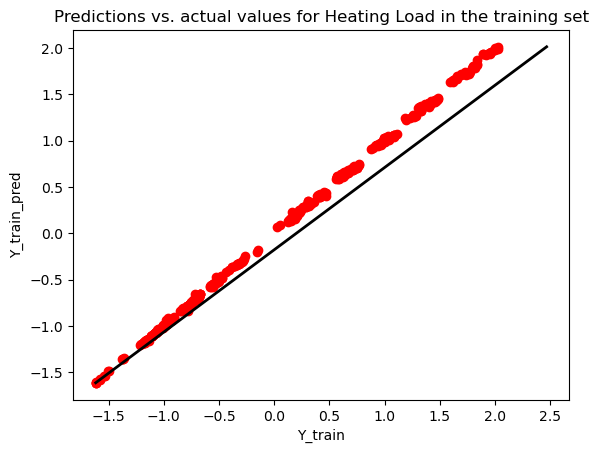

In [80]:
# HEATING LOAD PREDICTION for training set

y_train_pred = heating_rfr_model.predict(x_train)

plt.scatter(y_train_heating,y_train_pred,color='r')
plt.plot([y_train.min(), y_train.max()], [y_train_pred.min(), y_train_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_train")
plt.ylabel("Y_train_pred")
plt.title("Predictions vs. actual values for Heating Load in the training set")

y_train_pred_heating = y_train_pred

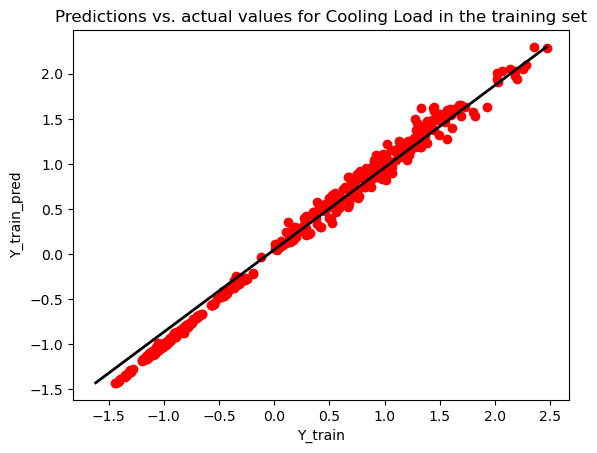

In [82]:
#COOLING LOAD PREDICTION for training set

y_train_pred = cooling_rfr_model.predict(x_train)

plt.scatter(y_train_cooling,y_train_pred,color='r')
plt.plot([y_train.min(), y_train.max()], [y_train_pred.min(), y_train_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_train")
plt.ylabel("Y_train_pred")
plt.title("Predictions vs. actual values for Cooling Load in the training set")

y_train_pred_cooling = y_train_pred

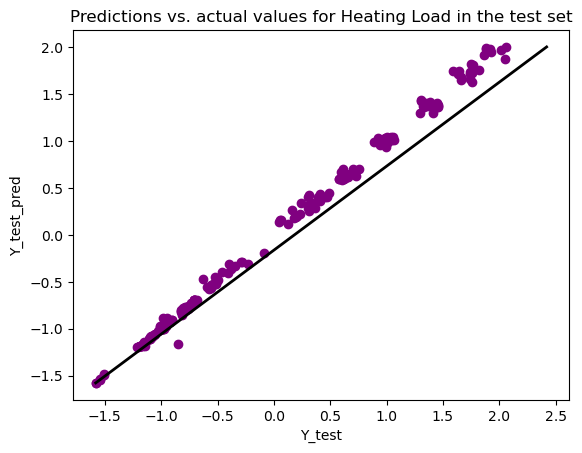

In [84]:
# HEATING LOAD PREDICTION for testing set


y_test_pred = heating_rfr_model.predict(x_test)

plt.scatter(y_test_heating,y_test_pred,color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test_pred.min(), y_test_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_test")
plt.ylabel("Y_test_pred")
plt.title("Predictions vs. actual values for Heating Load in the test set")

y_test_pred_heating = y_test_pred

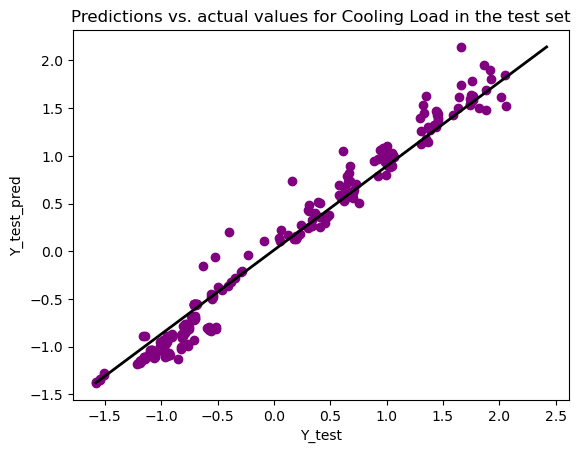

In [88]:
# COOLING LOAD PREDICTION for testing set


y_test_pred = cooling_rfr_model.predict(x_test)

plt.scatter(y_test_heating,y_test_pred,color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test_pred.min(), y_test_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_test")
plt.ylabel("Y_test_pred")
plt.title("Predictions vs. actual values for Cooling Load in the test set")

y_test_pred_cooling = y_test_pred

## Model Performance

In [64]:
from sklearn import metrics

# Performance for Heating load from training set
MSE_train = metrics.mean_squared_error(y_train_heating  * std[8] + mean[8], y_train_pred_heating * std[8] + mean[8])
RMSE_train = np.sqrt(MSE_train)   
r2_train = metrics.r2_score(y_train_heating, y_train_pred_heating)

print("FOR HEATING LOAD PREDICTION (TRAINING SET): ")
print(f"MSE: {MSE_train}")
print(f"RMSE: {RMSE_train}")
print(f"R2 SCORE: {r2_train}")

FOR HEATING LOAD PREDICTION (TRAINING SET): 
MSE: 0.03334237240668422
RMSE: 0.18259893867896446
R2 SCORE: 0.9996654387104941


In [65]:
# Performance for Cooling load from training set


MSE_train = metrics.mean_squared_error(y_train_cooling * std[9] + mean[9], y_train_pred_cooling * std[9] + mean[9])
RMSE_train = np.sqrt(MSE_train)   
r2_train = metrics.r2_score(y_train_cooling, y_train_pred_cooling)


print("FOR COOLING LOAD PREDICTION (TRAINING SET): ")
print(f"MSE: {MSE_train}")
print(f"RMSE: {RMSE_train}")
print(f"R2 SCORE: {r2_train}")

FOR COOLING LOAD PREDICTION (TRAINING SET): 
MSE: 0.4339898869162302
RMSE: 0.6587790880987573
R2 SCORE: 0.9950466738032124


In [66]:
# Performance for Heating load from testing set


MSE_test = metrics.mean_squared_error(y_test_heating * std[8] + mean[8], y_test_pred_heating * std[8] + mean[8])
RMSE_test = np.sqrt(MSE_test)  
r2_test = metrics.r2_score(y_test_heating, y_test_pred_heating)

print("FOR HEATING LOAD PREDICTION (TESTING SET): ")
print(f"MSE: {MSE_test}")
print(f"RMSE: {RMSE_test}")
print(f"R2 SCORE: {r2_test}")

FOR HEATING LOAD PREDICTION (TESTING SET): 
MSE: 0.23995155123264186
RMSE: 0.4898484982447551
R2 SCORE: 0.9977226007176286


In [67]:
# Performance for Cooling load from testing set


MSE_test = metrics.mean_squared_error(y_test_cooling * std[9] + mean[9], y_test_pred_cooling * std[9] + mean[9])
RMSE_test = np.sqrt(MSE_test)  
r2_test = metrics.r2_score(y_test_cooling, y_test_pred_cooling)


print("FOR COOLING LOAD PREDICTION (TESTING SET): ")
print(f"MSE: {MSE_test}")
print(f"RMSE: {RMSE_test}")
print(f"R2 SCORE: {r2_test}")

FOR COOLING LOAD PREDICTION (TESTING SET): 
MSE: 2.9484871515755184
RMSE: 1.7171159400505018
R2 SCORE: 0.969210852414764


In [68]:
print(f"Heating Load Range: {np.max(y.iloc[:, 0]) - np.min(y.iloc[:, 0])}")
print(f"Cooling Load Range: {np.max(y.iloc[:, 1]) - np.min(y.iloc[:, 1])}")


Heating Load Range: 37.09
Cooling Load Range: 37.13


### Notes:
1. The RMSE value if about 5% of the range of the desired values in case of the testing dataset, and about 2-1% in case of the training dataset.
2. Overall, the errors here are lesser than the erroes were in case of Linear Regression. The r2 scores are also higher. It means these models can predict the results more accurately.
3. However, there is a significant difference between the MSE, RMSE and R2 values of the training and test datasets. This means that the model can be improved much more if more training data is provided. Providing more data will ensure that we see the similar levels of accuracy in the real world as we do in case of the test samples. 

## Final Output

In [71]:
data

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,...,X3 (std units),X4 (std units),X5 (std units),X6 (std units),X7 (std units),X8 (std units),Y1 (std units),Y2 (std units),Predicted Y1,Predicted Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,...,-0.561951,-1.470077,1.0,-1.341641,-1.760447,-1.814575,-0.670116,-0.342666,22.964656,25.893537
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,...,-0.561951,-1.470077,1.0,-0.447214,-1.760447,-1.814575,-0.670116,-0.342666,22.934474,26.019898
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,...,-0.561951,-1.470077,1.0,0.447214,-1.760447,-1.814575,-0.670116,-0.342666,22.904292,26.146259
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,...,-0.561951,-1.470077,1.0,1.341641,-1.760447,-1.814575,-0.670116,-0.342666,22.874109,26.272620
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,...,0.000000,-1.198678,1.0,-1.341641,-1.760447,-1.814575,-0.145503,0.388366,25.162071,28.120333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40,...,0.561951,0.972512,-1.0,1.341641,1.244049,1.411336,-0.439049,-0.335303,18.284975,19.709828
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88,...,1.123903,0.972512,-1.0,-1.341641,1.244049,1.411336,-0.571937,-0.810736,19.035489,19.648185
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11,...,1.123903,0.972512,-1.0,-0.447214,1.244049,1.411336,-0.581854,-0.786544,19.005307,19.774546
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61,...,1.123903,0.972512,-1.0,0.447214,1.244049,1.411336,-0.577887,-0.839136,18.975124,19.900907


In [72]:
prediction = heating_rfr_model.predict(data.iloc[:, 10:18].to_numpy())
prediction = prediction * np.std(data['Y1']) + np.mean(data['Y1'])
data['Predicted Y1 (rfr)'] = prediction

prediction = cooling_rfr_model.predict(data.iloc[:, 10:18].to_numpy())
prediction = prediction * np.std(data['Y2']) + np.mean(data['Y2'])
data['Predicted Y2 (rfr)'] = prediction

In [73]:
data.iloc[:, 0:8]

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


In [74]:
wanted_cols = []

for i in range(1, 9):
    wanted_cols.append('X' + str(i))


wanted_cols += ['Y1', 'Y2', 'Predicted Y1 (rfr)', 'Predicted Y2 (rfr)']
final_output = data[wanted_cols].copy()
final_output.rename(columns={'Y1': 'Actual Heating Load', 'Y2': 'Actual Cooling Load', 'Predicted Y1 (rfr)': 'Predicted Heating Load', 'Predicted Y2 (rfr)': 'Predicted Cooling Load'}, inplace=True)

final_output.to_csv('data_RSR.csv')

final_output



,X1,X2,X3,X4,X5,X6,X7,X8,Actual Heating Load,Actual Cooling Load,Predicted Heating Load,Predicted Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,15.740033,22.235900
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,15.668433,21.406800
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,15.712767,21.430900
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,15.700033,21.653767
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,20.509000,27.731633
...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40,18.078233,21.280767
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88,16.488933,16.955600
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11,16.601867,16.995267
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61,16.652200,16.714800


## Function For Using Randrom Forest Regression Model

In [76]:
mean
std

[0.10570858789878704,
 88.02874964401614,
 43.598069529127855,
 45.13653572926124,
 1.75,
 1.118033988749895,
 0.13313380252588097,
 1.5499495959546556,
 10.083624454375261,
 9.50710998657144]

In [77]:
def prediction_rfr():
    print("Please Give the Following Inputs: ")
    x1 = float(input("Relative Compactness: "))
    x2 = float(input("Surface Area: "))
    x3 = float(input("Wall Area: "))
    x4 = float(input("Roof Area: "))
    x5 = float(input("Overall Height: "))
    x6 = float(input("Orientation: "))
    x7 = float(input("Glazing Area: "))
    x8 = float(input("Glazing Area Distribution: "))


    inpt = [x1, x2, x3, x4, x5, x6, x7, x8]

    for i in range(0, 8):
        inpt[i] = (inpt[i] - mean[i]) / std[i]
    
    inpt = np.array(inpt)
    inpt = inpt.reshape(1, -1)
    heating_load_pred = (heating_rfr_model.predict(inpt) * std[8]) + mean[8]

    cooling_load_pred = (cooling_rfr_model.predict(inpt) * std[9]) + mean[9]

    print(f"Predicted Headting Load: {heating_load_pred} | Predicted Cooling Load: {cooling_load_pred}")



## Predictions for 3 Possible Feature Combinations

In [90]:
prediction_rfr()

Please Give the Following Inputs: 


Relative Compactness:  0.62
Surface Area:  808.50
Wall Area:  367.50
Roof Area:  220.50
Overall Height:  3.50
Orientation:  3
Glazing Area:  0.10
Glazing Area Distribution:  1


Predicted Headting Load: [12.9698] | Predicted Cooling Load: [14.48396667]


In [92]:
prediction_rfr()

Please Give the Following Inputs: 


Relative Compactness:  0.76
Surface Area:  661.50
Wall Area:  416.50
Roof Area:  122.50
Overall Height:  7.00
Orientation:  4
Glazing Area:  0.10
Glazing Area Distribution:  2


Predicted Headting Load: [32.91916667] | Predicted Cooling Load: [34.15816667]


In [94]:
prediction_rfr()

Please Give the Following Inputs: 


Relative Compactness:  0.66
Surface Area:  759.50
Wall Area:  318.50
Roof Area:  220.50
Overall Height:  3.50
Orientation:  4
Glazing Area:  0.10
Glazing Area Distribution:  5


Predicted Headting Load: [11.3677] | Predicted Cooling Load: [14.7776]
